In [1]:
import numpy as np
import matplotlib.pyplot as plt

# read image

In [2]:
src_img = plt.imread("1.jpg")[...,0:3]
dst_img = plt.imread("2.png")[...,0:3]

if(np.max(src_img)>1.0):
    src_img = np.array(src_img,dtype='float32')/255.0
if(np.max(dst_img)>1.0):
    dst_img = np.array(dst_img,dtype='float32')/255.0

## RGB to LAB
follow the paper chapter "Decorrelated color space"

In [3]:
def RGB2LAB(rgb):
    # RGB to LMS
    cvt_mat = np.array([[0.3811,0.5783,0.0402],
                        [0.1967,0.7244,0.0782],
                        [0.0241,0.1288,0.8444]])
    lms = np.zeros_like(rgb)
    for i in range(rgb.shape[0]):
        for j in range(rgb.shape[1]):
            lms[i,j,...] = np.dot(cvt_mat,rgb[i,j,...])
    lms[lms==0]=1
    lms = np.log10(lms)
    # LMS to lab
    lms_lab_mat1 = np.array([[1.0/np.sqrt(3.0),0,0],
                             [0,1.0/np.sqrt(6.0),0],
                             [0,0,1.0/np.sqrt(2.0)]])
    lms_lab_mat2 = np.array([[1,1,1],[1,1,-2],[1,-1,0]])
    lms_lab_mat = np.dot(lms_lab_mat1 , lms_lab_mat2)
    lab = np.zeros_like(lms)
    for i in range(lms.shape[0]):
        for j in range(lms.shape[1]):
            lab[i,j,...] = np.dot(lms_lab_mat,lms[i,j,...])
    return lab

## color shift
dst image's color to source image

In [4]:
def shift_channel(sc,dc):
    # dst image's color to soure image
    s_mean = np.mean(sc)
    d_mean = np.mean(dc)
    s_std = np.std(sc)
    d_std = np.std(dc)
    shift_sc = (sc-s_mean)/s_std * d_std + d_mean
    return shift_sc

## LAB back to RGB
follow the paper chapter "Decorrelated color space"

In [5]:
def LAB2RGB(lab):
    #lab to lms
    lab_lms_mat1 = np.array([[1,1,1],[1,1,-1],[1,-2,0]])
    lab_lms_mat2 = np.array([[np.sqrt(3.0)/3.0,0,0],
                             [0,np.sqrt(6.0)/6.0,0],
                             [0,0,np.sqrt(2.0)/2.0]])
    lab_lms_mat = np.dot(lab_lms_mat1,lab_lms_mat2)
    lms = np.zeros_like(lab)
    for i in range(lab.shape[0]):
        for j in range(lab.shape[1]):
            lms[i,j,...] = np.dot(lab_lms_mat,lab[i,j,...])
    lms = 10**lms
    # lms to rgb 
    lms_rgb_mat = np.array([[4.4679,-3.5873,0.1193],
                            [-1.2186,2.3809,-0.1624],
                            [0.0497,-0.2439,1.2045]])
    rgb = np.zeros_like(lms)
    for i in range(lms.shape[0]):
        for j in range(lms.shape[1]):
            rgb[i,j,...] = np.dot(lms_rgb_mat,lms[i,j,...])
    rgb = np.clip(rgb,0.0,1.0)
    return rgb

In [6]:
src_lab = RGB2LAB(src_img)
dst_lab = RGB2LAB(dst_img)

In [7]:
src_lab_new = np.zeros_like(dst_lab)
for i in range(src_lab_new.shape[2]):
    src_lab_new[...,i] = shift_channel(src_lab[...,i],dst_lab[...,i])

In [8]:
result = LAB2RGB(src_lab_new)

(-0.5, 767.5, 511.5, -0.5)

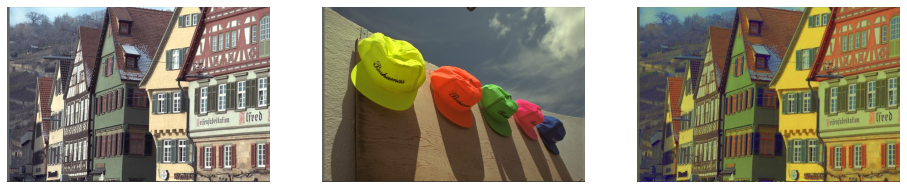

In [9]:
plt.figure(figsize=(16,16))
plt.subplot(131)
plt.imshow(src_img)
plt.axis('off')
plt.subplot(132)
plt.imshow(dst_img)
plt.axis('off')
plt.subplot(133)
plt.imshow(result)
plt.axis('off')

In [10]:
combine_img = src_img.copy()
combine_img[:,src_img.shape[1]//2:src_img.shape[1],:] = result[:,src_img.shape[1]//2:src_img.shape[1],:]

In [11]:
plt.imsave('combine_result.jpg',combine_img)